In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [50]:
# Loading the data
df = pd.read_csv('./data/data.csv')

# Dropping unnamed column
df = df.drop(df.columns[-1], axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
df.info()

# No NULL values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [52]:
df.describe().T

# No missing values (Usually stated as -1)

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


diagnosis
B    357
M    212
Name: count, dtype: int64


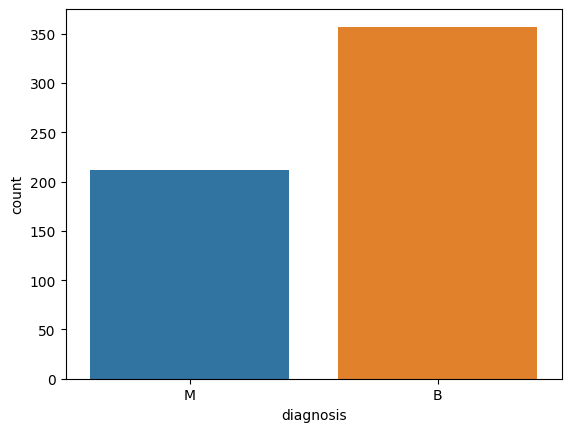

In [53]:
# Checking data distribution and balance

print(df['diagnosis'].value_counts())
_ = sns.countplot(df, x='diagnosis', hue='diagnosis')
# Data seems to be imbalanced

In [54]:
# Encoding target to 0 and 1
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B':0})

In [55]:
# Understanding correleation 
corr = df.corr()
corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Axes: >

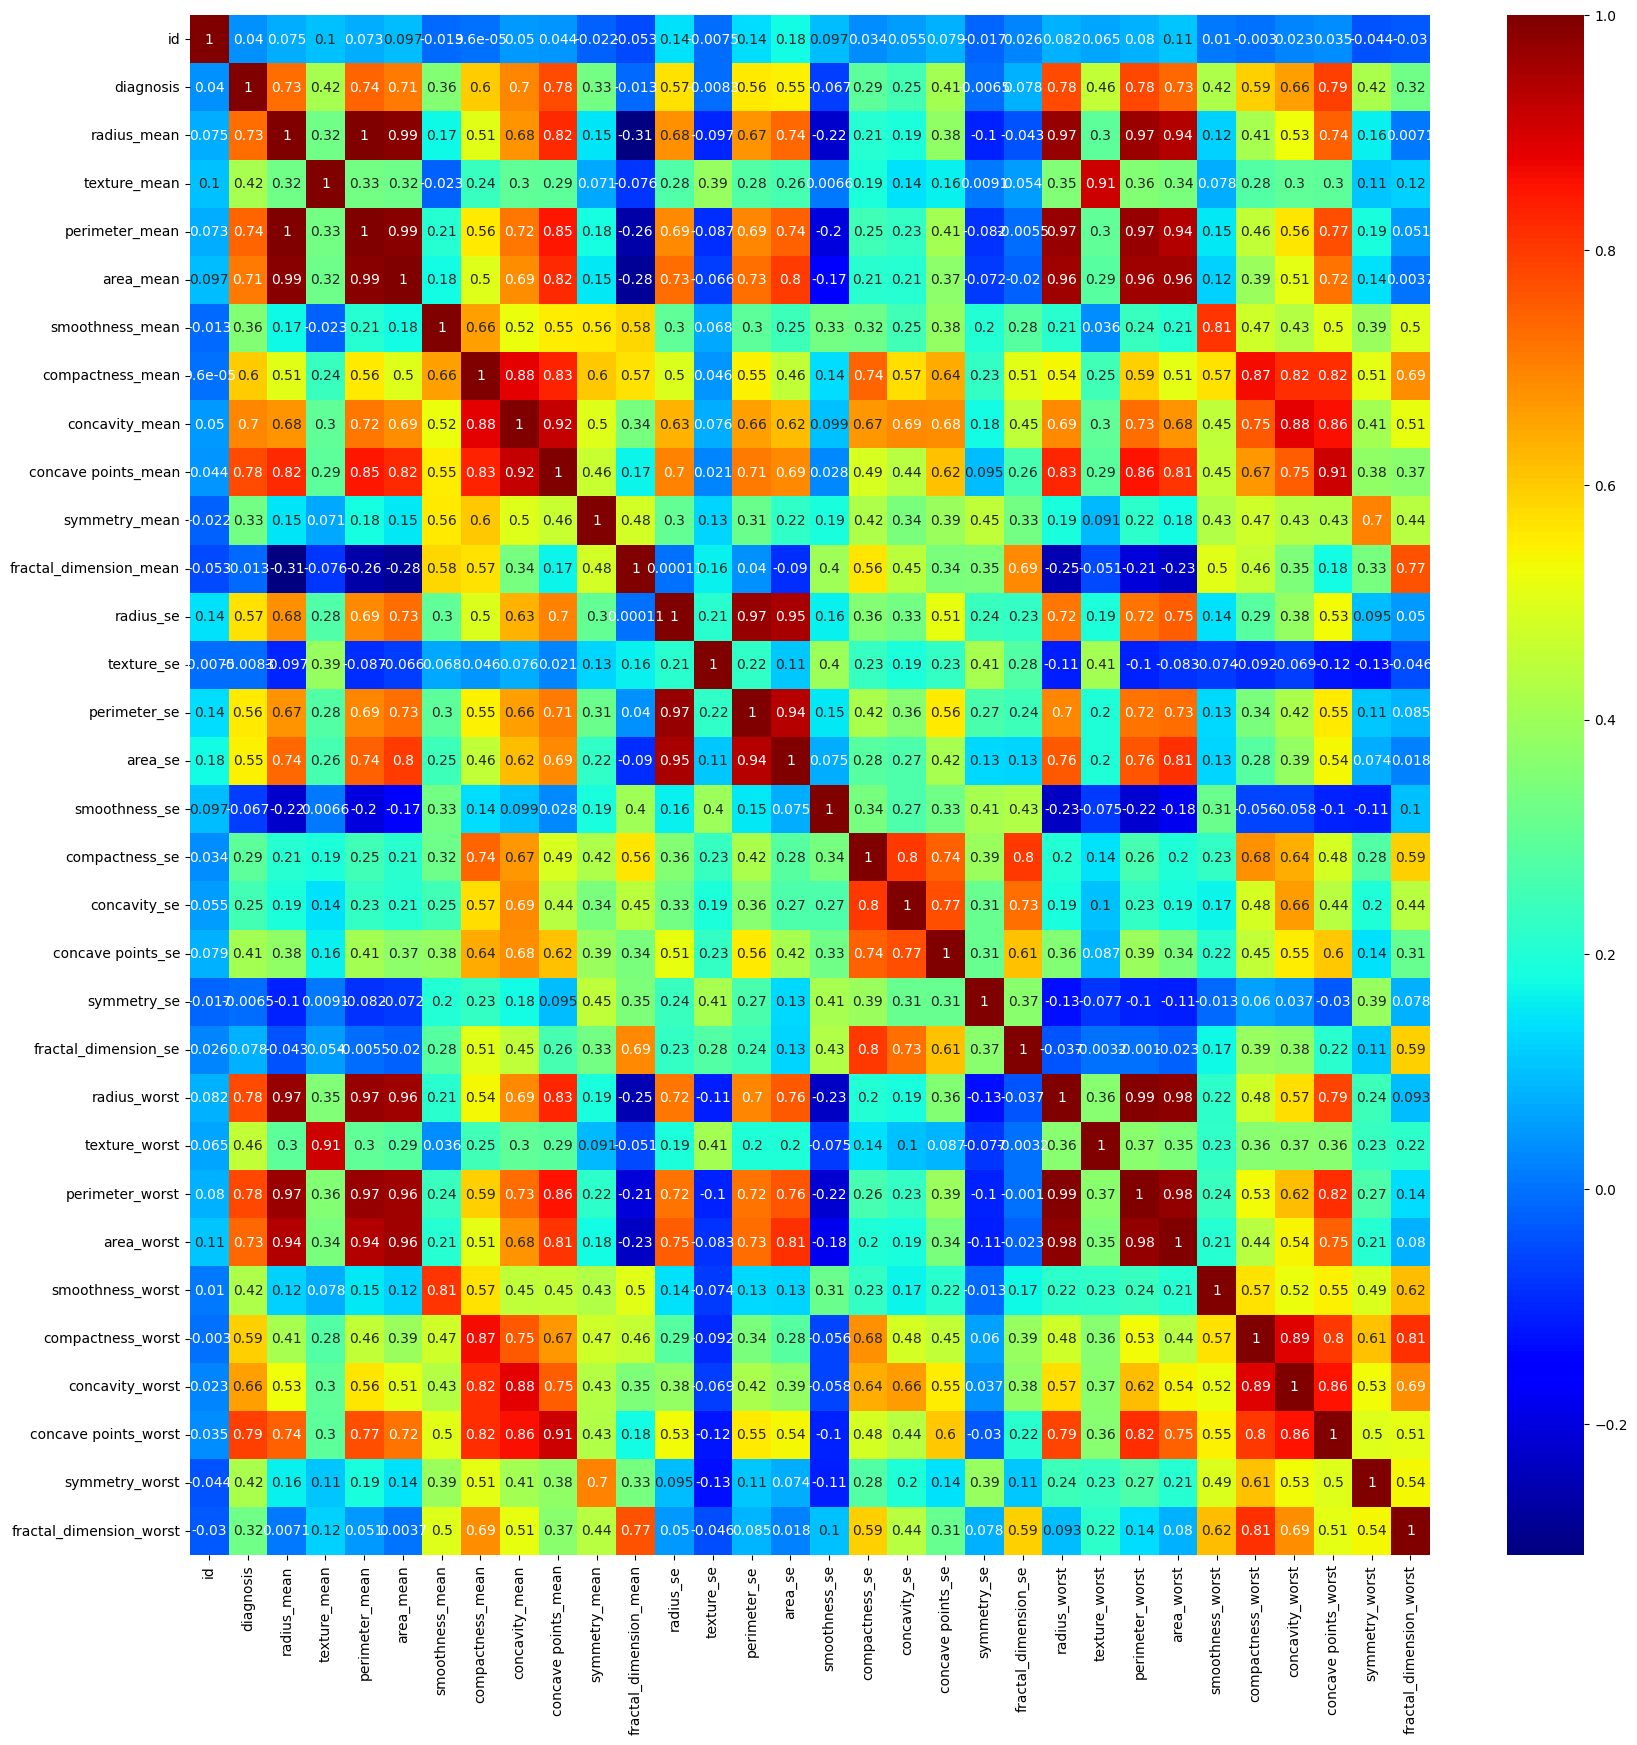

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='jet')

<Figure size 1000x800 with 0 Axes>

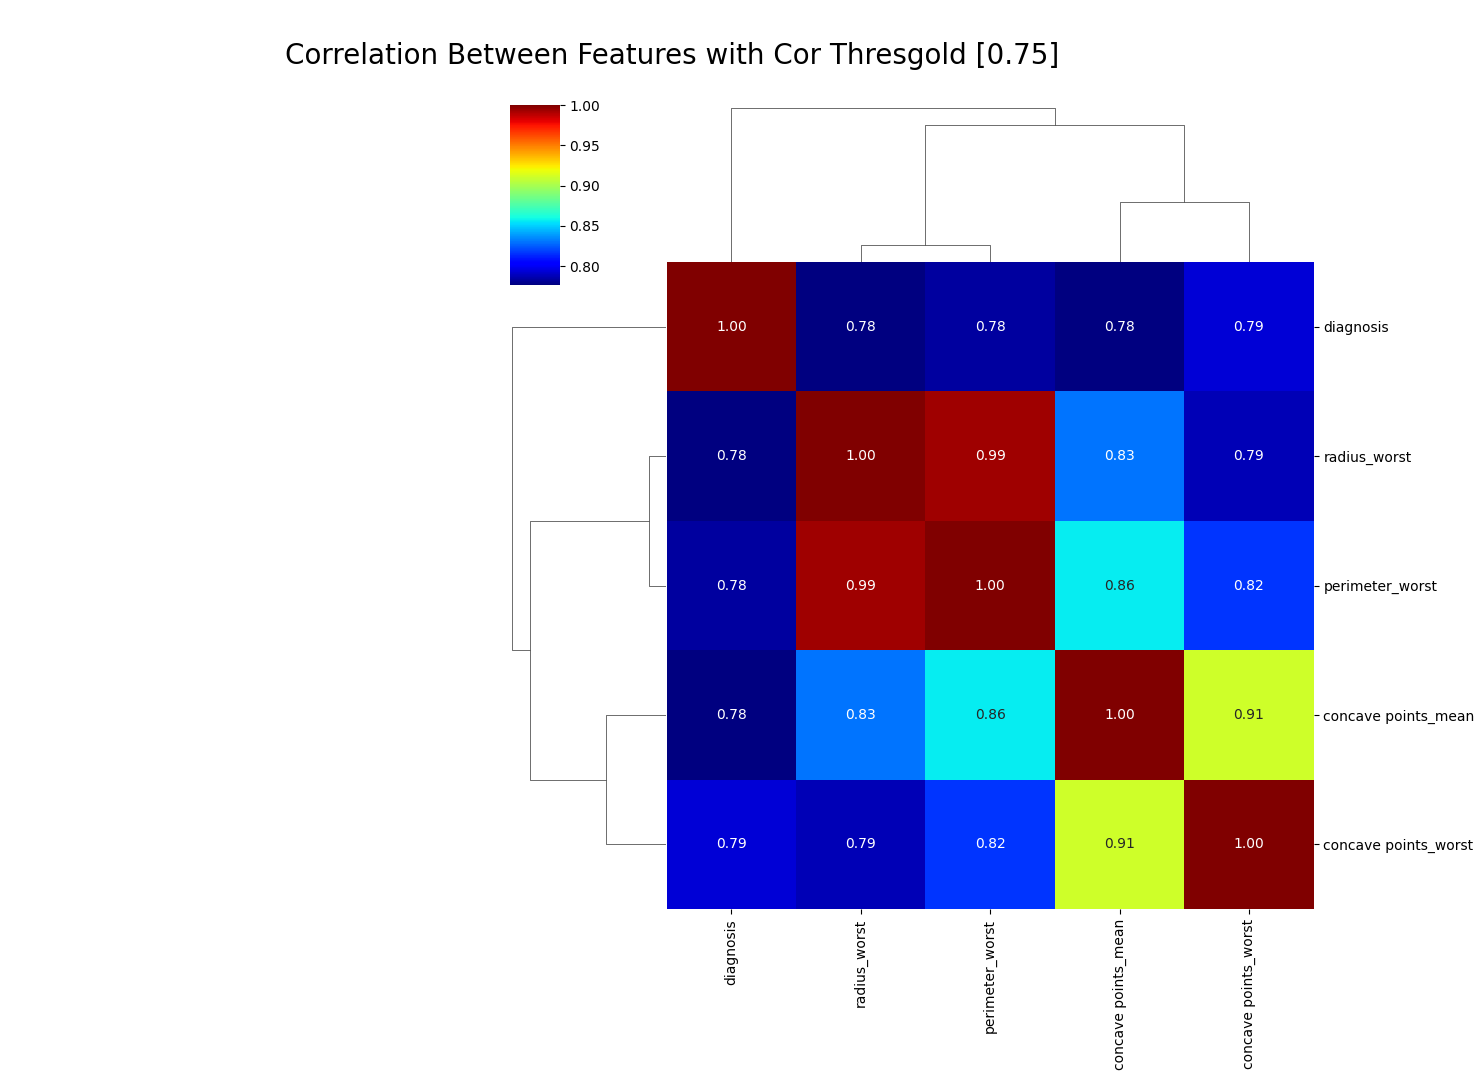

In [70]:
# Using data with high correlation

threshold = 0.75
filtre = np.abs(corr["diagnosis"] > threshold)
corr_features = corr.columns[filtre].tolist()
plt.figure(figsize=(10,8))
sns.clustermap(df[corr_features].corr(), annot = True, fmt = ".2f", cmap='jet')
plt.title("\n                               Correlation Between Features with Cor Thresgold [0.75]\n",fontsize=20)
plt.show()

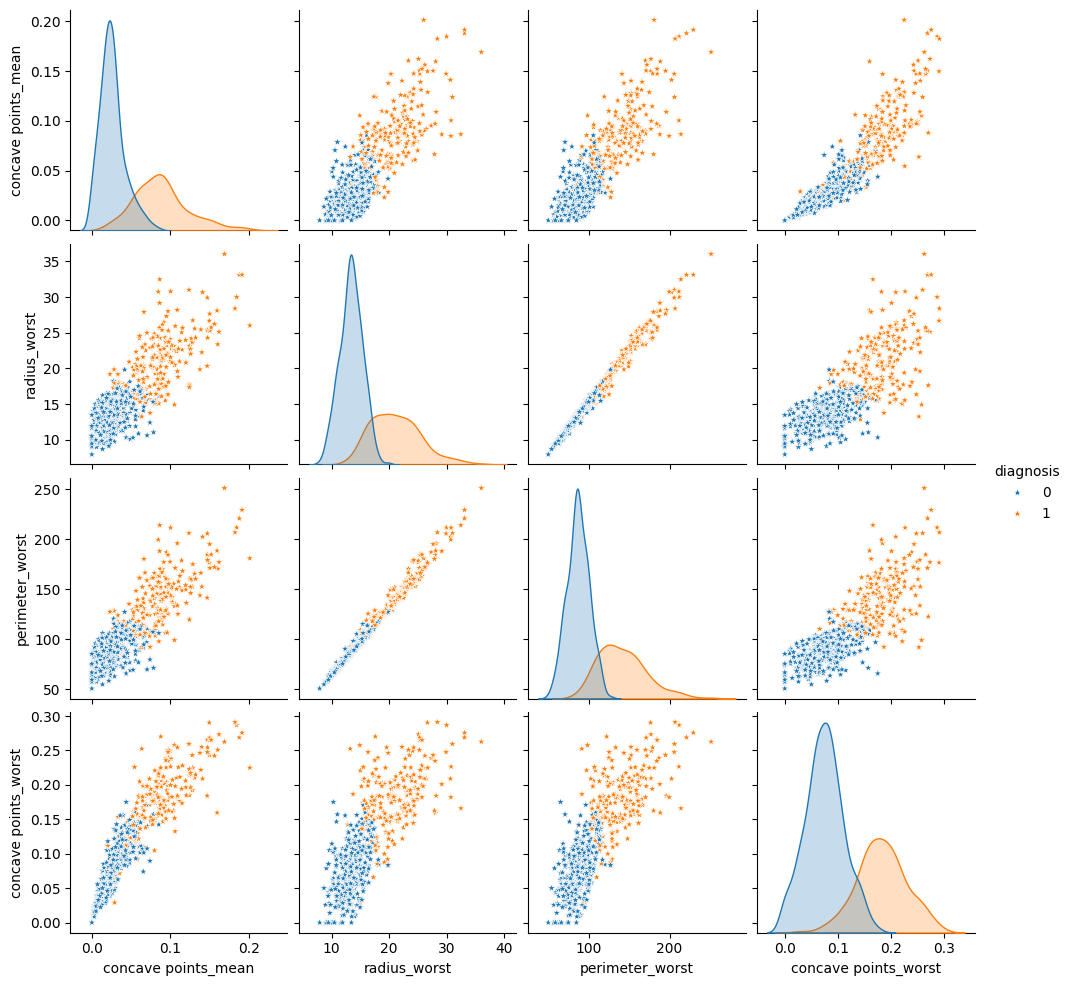

In [58]:
sns.pairplot(df[corr_features], diag_kind = "kde" , markers = "*", hue="diagnosis")
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scaling data using standard scaler
scaler = StandardScaler()

X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

X_norm = scaler.fit_transform(X)

# Making a train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=10)

In [71]:
X_train

array([[ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.10147593, -1.40081262, -0.16101387, ..., -0.86161564,
        -0.12579168, -0.88697545],
       [ 0.35294679,  0.80757409,  0.33903516, ...,  0.50238296,
        -0.55773911, -0.86813407],
       ...,
       [-0.50761623, -1.63351933, -0.53666849, ..., -0.1158169 ,
         0.33851135, -0.44475722],
       [-0.07875479, -0.48394817, -0.14536159, ..., -0.96789729,
        -0.86835298, -0.67196207],
       [ 1.87526288,  2.75300221,  1.80128727, ...,  0.78102969,
        -0.05299156, -0.0978542 ]])

In [60]:
import torch
import torch.nn as nn
from torch.optim import SGD

torch.manual_seed(0)
device = torch.device("mps")

In [61]:
# Implementing Logistic Regression from scratch

class LogisticRegression(nn.Module):
    def __init__(self, n_in, n_out):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_in, n_out)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid(self.linear(x))
        return x

In [62]:
# Init model

in_features = X_train.shape[1]
out_features = 1

model = LogisticRegression(in_features, out_features)

In [63]:
# Making data tensors

X_train_tensor = torch.tensor(X_train).float()
X_test_tensor = torch.tensor(X_test).float()
y_train_tensor = torch.tensor(np.array(y_train)).float()
y_test_tensor = torch.tensor(np.array(y_test)).float()

In [64]:
# Initialize parameters

# Using a very heavy L2 penalty as model tends to overfit
optimizer = SGD(model.parameters(), 0.01, 0.9, weight_decay=0.1)
criterion = nn.BCELoss()
epochs = 1000
batch_size = 32

In [65]:
# Making a train loop

loss_log = []
acc_log = []
val_loss_log = []
val_acc_log = []

# Setting a big number
best_acc = -1

for epoch in tqdm(range(epochs)):
    running_loss = []
    running_acc = []
    running_val_loss = []
    running_val_acc = []
    
    for batch in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        data = X_train_tensor[batch:batch+batch_size]
        target = y_train_tensor[batch:batch+batch_size]
        
        data.to(device)
        target.to(device)
        
        pred = model(data)
        abs_pred = torch.where(pred > 0.5, 1, 0).detach().cpu().numpy()
        abs_target = target.unsqueeze(1).detach().cpu().numpy()
        
        loss = criterion(pred, target.unsqueeze(1))
        acc = accuracy_score(abs_target, abs_pred)
        loss.backward()
        optimizer.step()
        
        running_loss.append(loss.item())
        running_acc.append(acc)
    
    with torch.no_grad():
        test_data = X_test_tensor
        test_target = y_test_tensor
        
        test_data.to(device)
        test_target.to(device)  
        
        pred = model(test_data)
        abs_pred = torch.where(pred > 0.5, 1, 0).detach().cpu().numpy()
        abs_target = test_target.unsqueeze(1).detach().cpu().numpy()
        
        val_loss = criterion(pred, test_target.unsqueeze(1))
        val_acc = accuracy_score(abs_target, abs_pred)
            
        running_val_loss.append(loss.item())
        running_val_acc.append(val_acc)
    
    # Saving models with best accuracy
    if np.array(running_val_acc).mean() > best_acc:
        best_acc = np.array(running_val_acc).mean()
        torch.save(model, './chkpt_1.pth')
    
    loss_log.append(np.array(running_loss).mean())
    acc_log.append(np.array(acc).mean())
    val_loss_log.append(np.array(running_val_loss).mean())
    val_acc_log.append(np.array(running_val_acc).mean())

100%|██████████| 1000/1000 [00:08<00:00, 120.82it/s]


In [66]:
best_model = torch.load("./chkpt_1.pth")

In [67]:
val_pred = best_model(X_test_tensor)
print(classification_report(y_test_tensor, torch.where(val_pred > 0.5, 1, 0).numpy()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        75
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



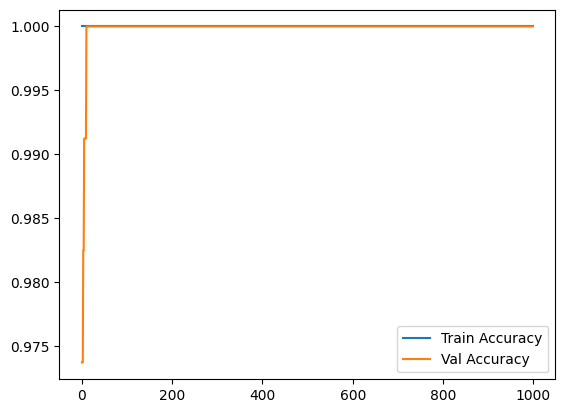

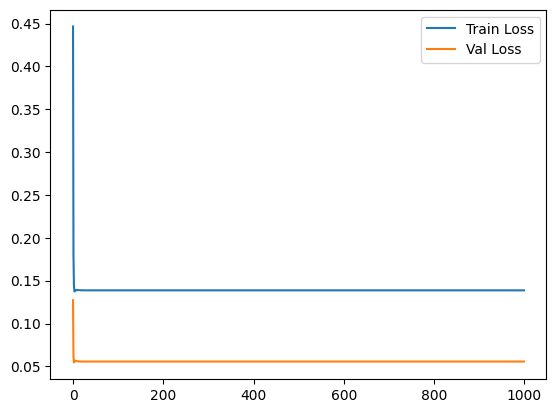

In [68]:
plt.plot(acc_log)
plt.plot(val_acc_log)
plt.legend(["Train Accuracy", "Val Accuracy"])
plt.show()

plt.plot(loss_log)
plt.plot(val_loss_log)
plt.legend(["Train Loss", "Val Loss"])

<Axes: >

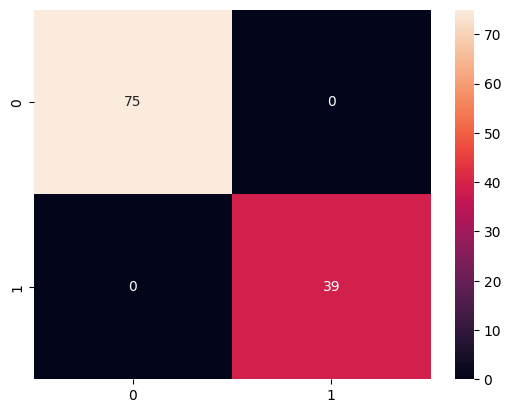

In [69]:
sns.heatmap(confusion_matrix(y_test_tensor, torch.where(val_pred > 0.5, 1, 0).numpy()), annot=True)